# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Reading the data and column meanings

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AlexanderOG/AI_CRI/main/train.csv')

<img src="https://github.com/AlexanderOG/AI_CRI/blob/414d1f65b11f64d7710d5c64398f4d7819787297/Titanic_variables.png?raw=True"></img>

# Basic data set exploration

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


[Text(0.5, 1.0, 'Null values count')]

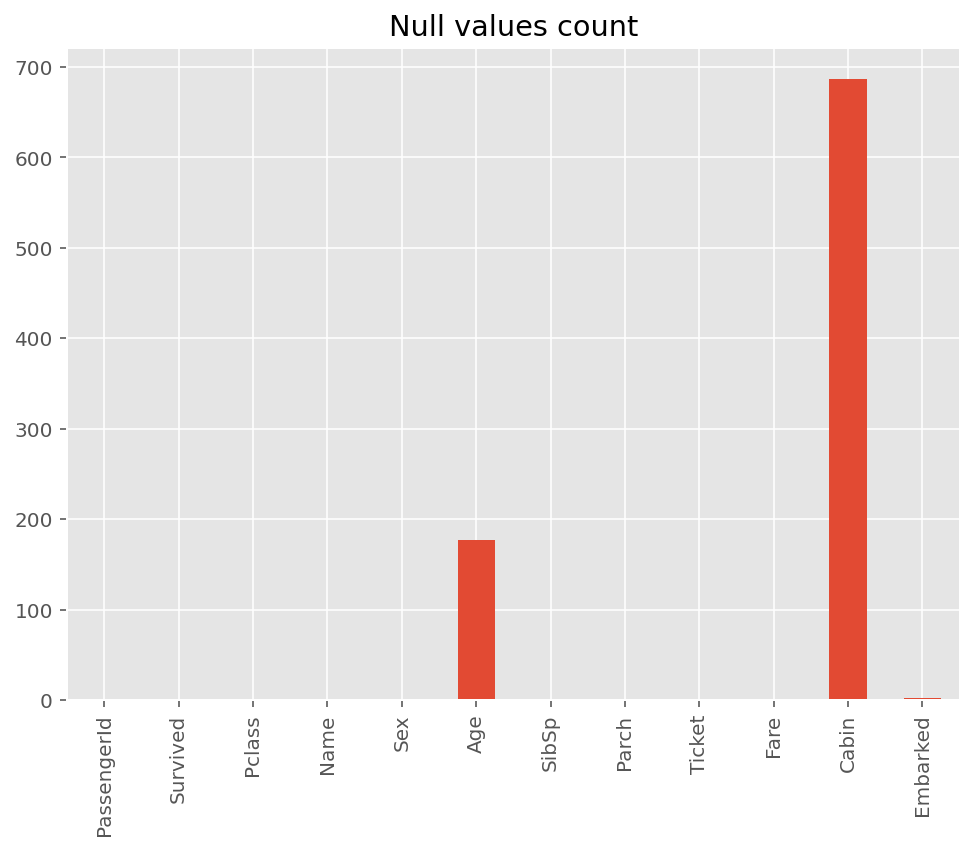

In [ ]:
data.isna().sum().plot(kind='bar').set(title="Null values count");

In [ ]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
data.Sex.value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [ ]:
data.Embarked.value_counts(normalize=True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [ ]:
#Preliminary analysis to decide which leads to explore
def encode_sex(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1

data['Sexcode'] = data['Sex'].apply(encode_sex)

In [ ]:
pearsoncorr = data[["Survived","Pclass","Sexcode","Age","Fare", "SibSp","Parch"]].corr(method='pearson')
pearsoncorr

,Survived,Pclass,Sexcode,Age,Fare,SibSp,Parch
Survived,1.000000,-0.338481,0.543351,-0.077221,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.131900,-0.369226,-0.549500,0.083081,0.018443
Sexcode,0.543351,-0.131900,1.000000,-0.093254,0.182333,0.114631,0.245489
Age,-0.077221,-0.369226,-0.093254,1.000000,0.096067,-0.308247,-0.189119
Fare,0.257307,-0.549500,0.182333,0.096067,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,0.114631,-0.308247,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,0.245489,-0.189119,0.216225,0.414838,1.000000


# Starting data visualization

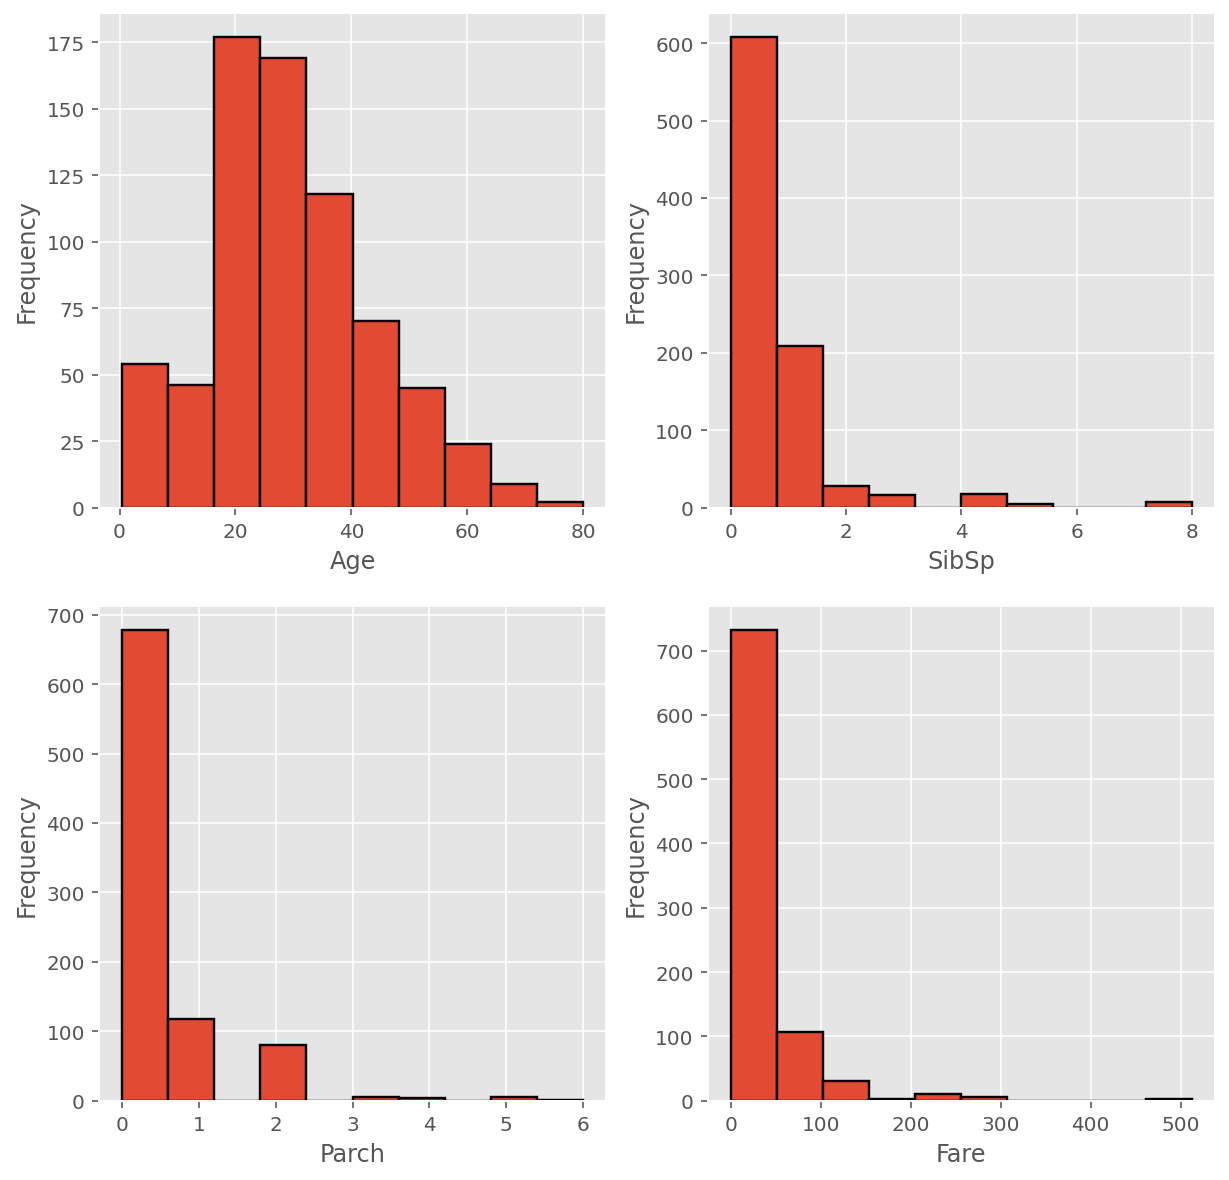

In [ ]:
categorical_data = ["PassengerId","Survived","Pclass","Name","Sex","Ticket","Cabin","Embarked"]
numerical_data = ["Age","SibSp","Parch","Fare"]
interesting_categorical = ["Survived","Pclass","Sex","Embarked"]

l = math.ceil(len(numerical_data)**0.5)

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (10, 10)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.2, wspace = 0.2) # adjust the amount of width and height reserved for space between subplots.

for i in range(len(numerical_data)):
    plt.subplot(l, l, i+1)
    plt.hist(data[numerical_data[i]], edgecolor='black', linewidth=1.2)
    plt.xlabel(numerical_data[i])
    plt.ylabel("Frequency")
    
plt.show()

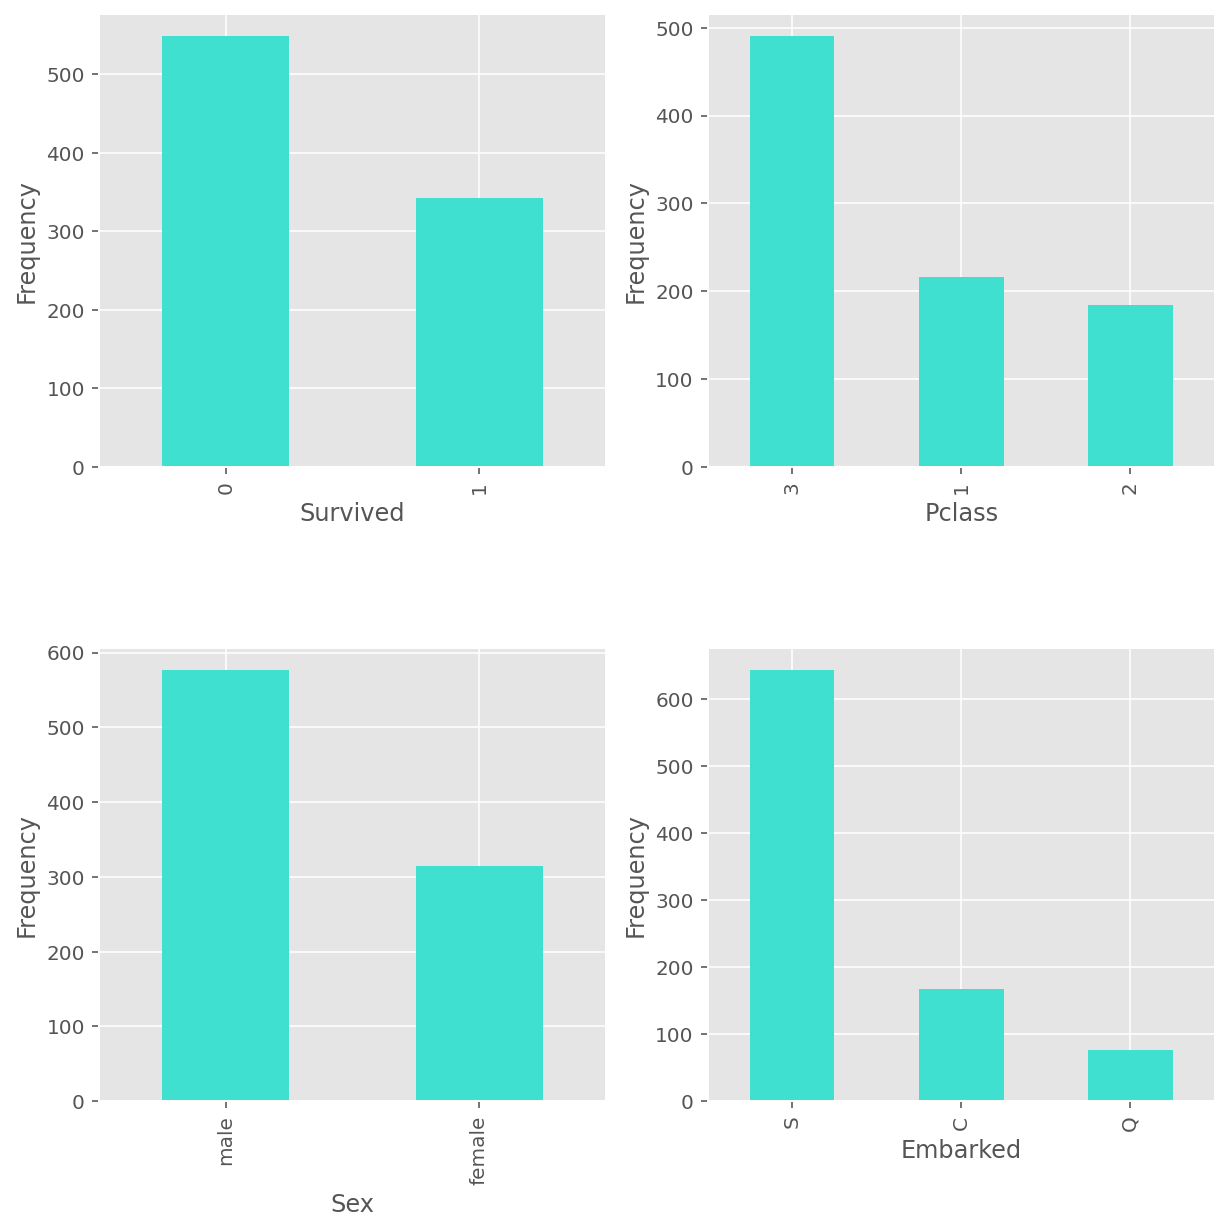

In [ ]:
l = math.ceil(len(interesting_categorical)**0.5)

plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.4, wspace = 0.2) # adjust the amount of width and height reserved for space between subplots.

for i in range(len(interesting_categorical)):
    plt.subplot(l, l, i+1)
    #plt.bar(data[interesting_categorical[i]], edgecolor='black', linewidth=1.2)
    data[interesting_categorical[i]].value_counts().plot(kind = 'bar', color = 'turquoise')
    plt.xlabel(interesting_categorical[i])
    plt.ylabel("Frequency")
    
plt.show()
plt.rcParams['figure.figsize'] = (8, 6)

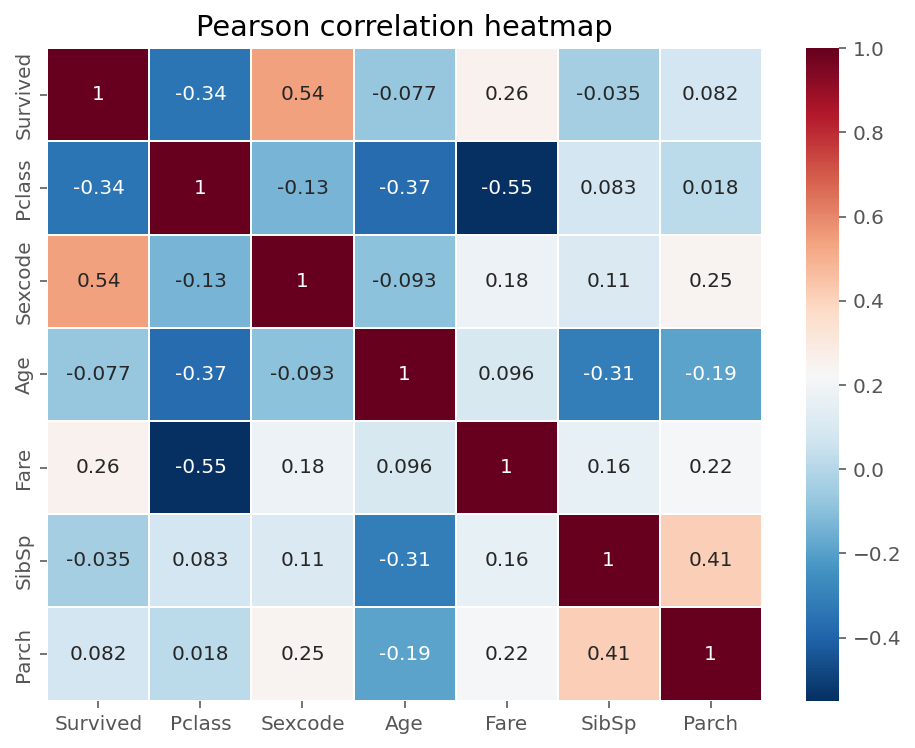

In [ ]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r', annot=True,
            linewidth=0.5)
plt.title('Pearson correlation heatmap');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


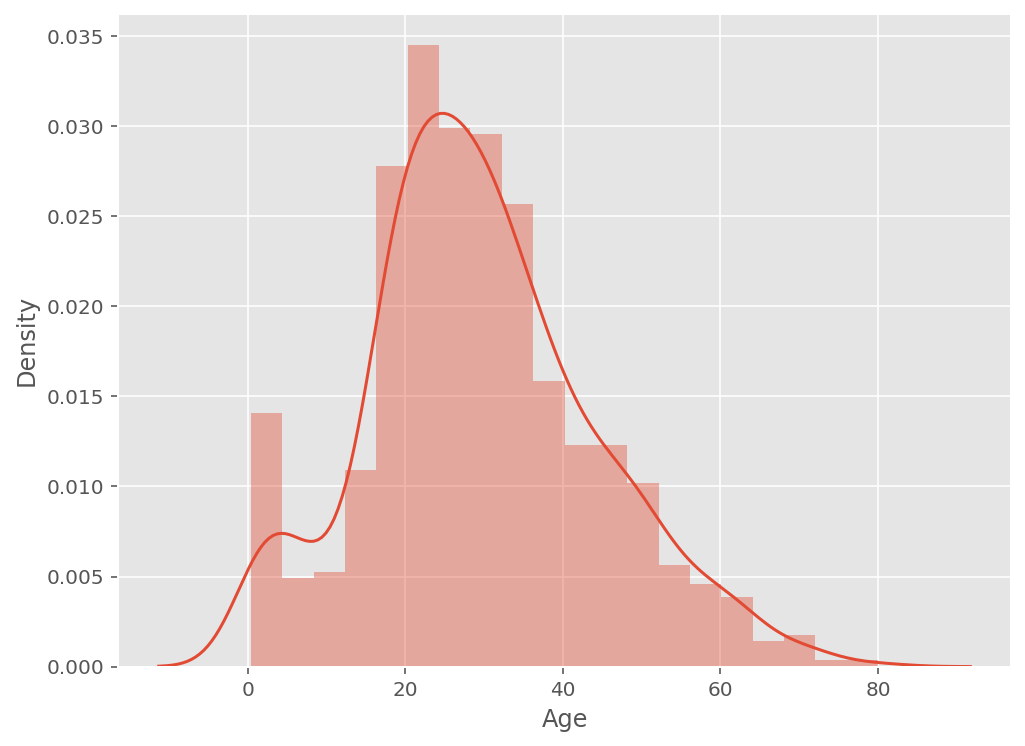

In [ ]:
sns.distplot(data.Age);

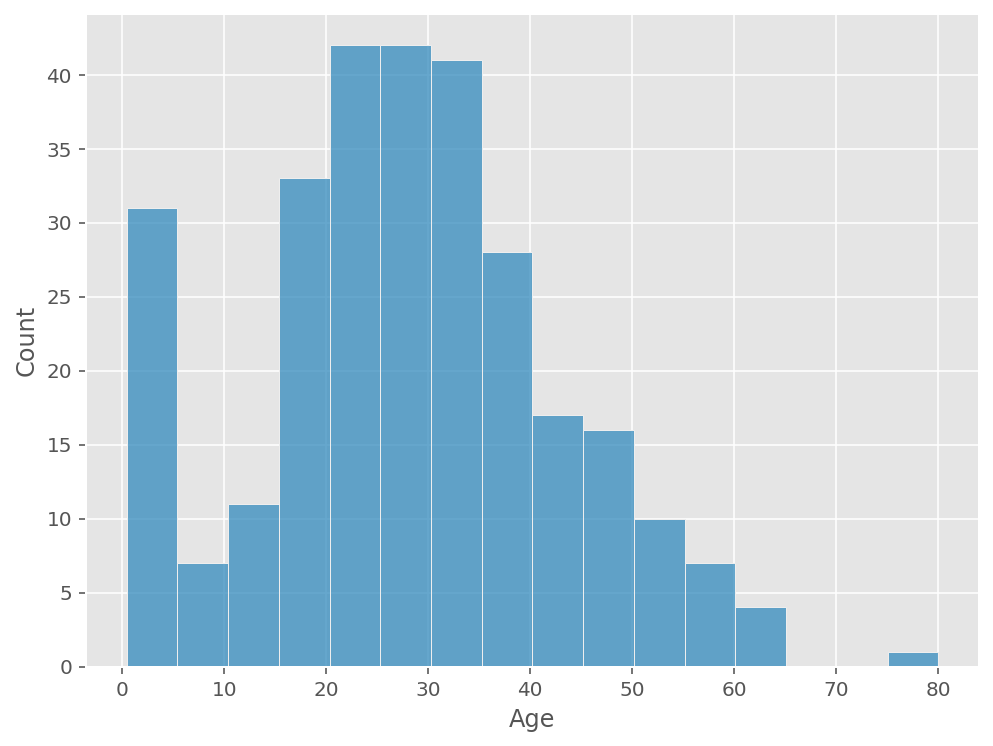

In [ ]:
sns.histplot(data=data[data["Survived"]==1].Age)

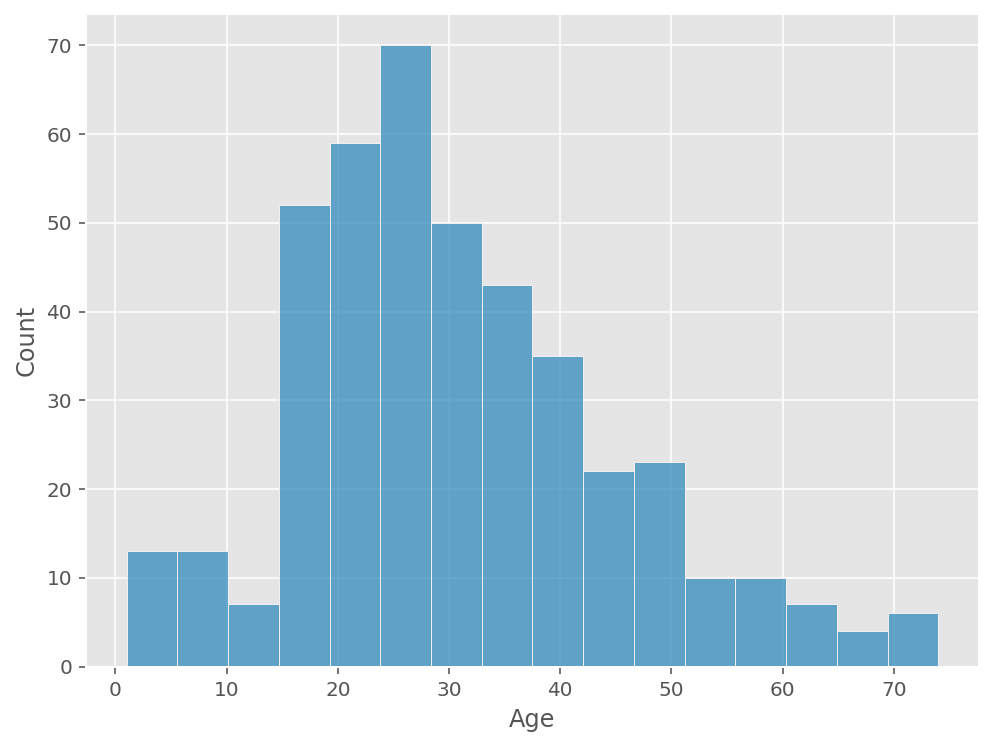

In [ ]:
sns.histplot(data=data[data["Survived"]==0].Age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


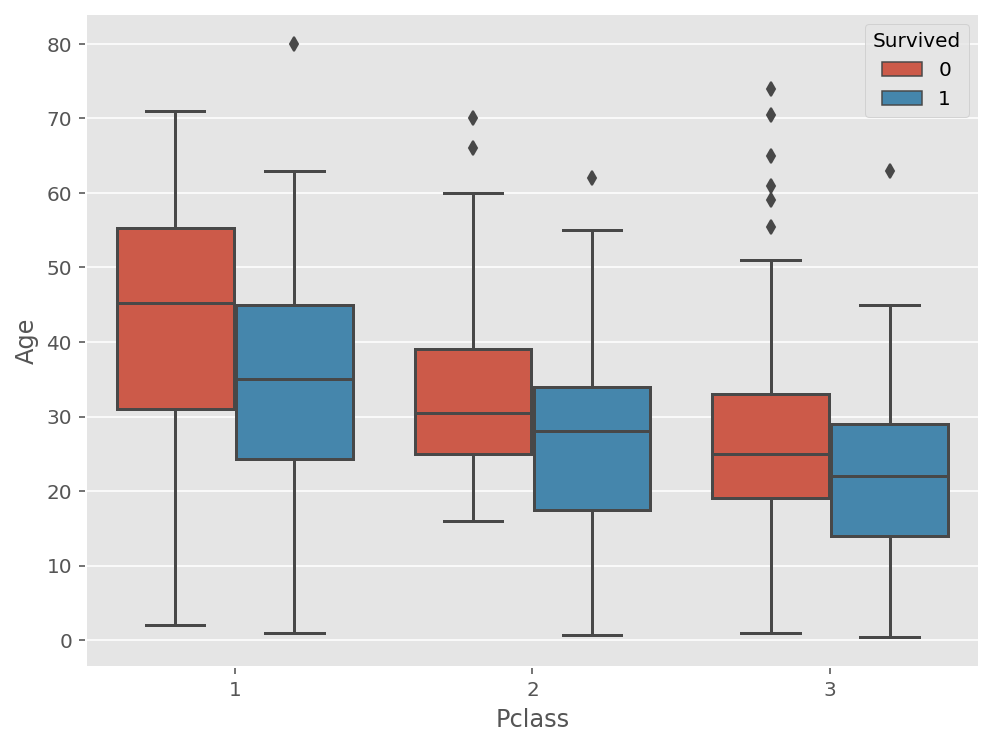

In [ ]:
sns.boxplot(data.Pclass, data.Age, hue = data.Survived)

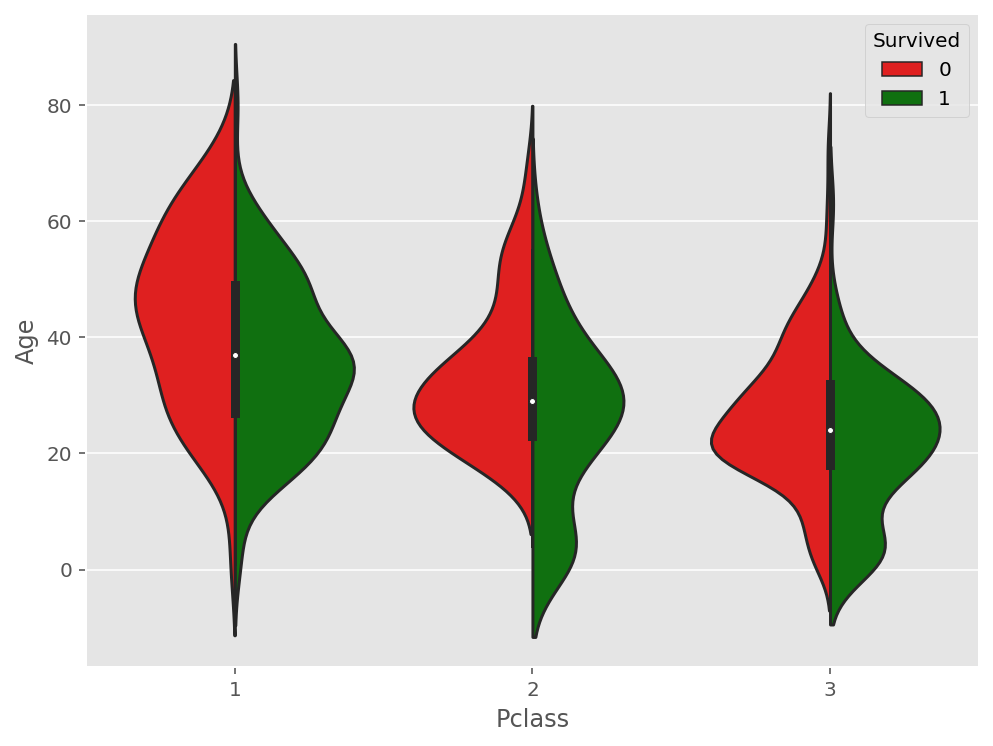

In [ ]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', split=True, data=data, palette={0: "r", 1: "g"})

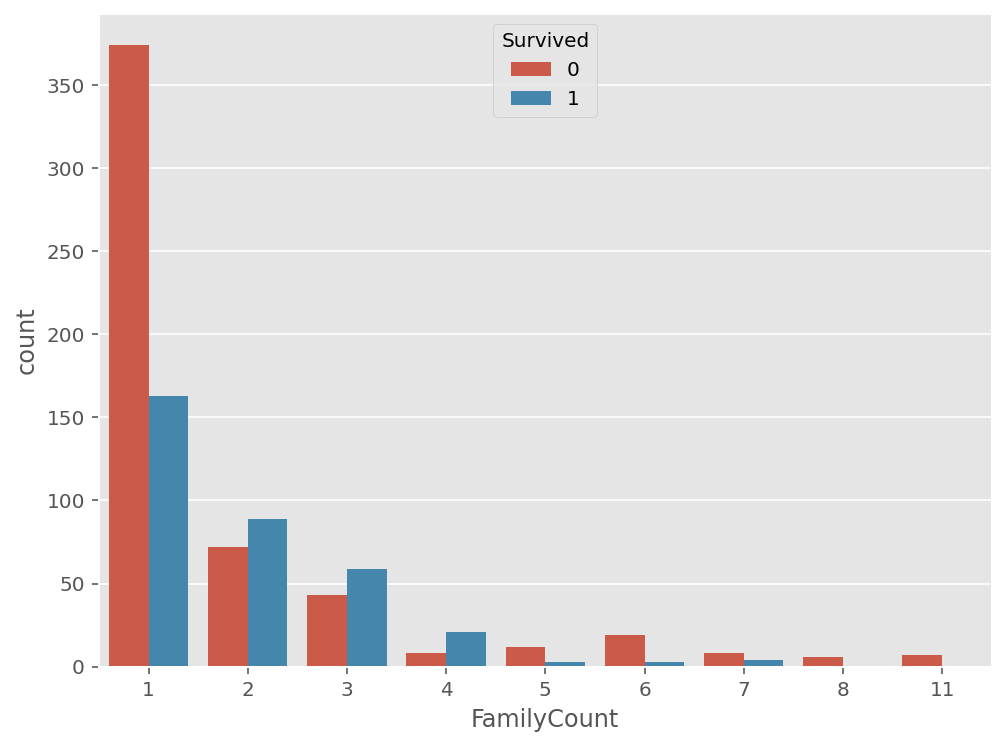

In [ ]:
data['FamilyCount']=data['Parch']+data['SibSp']+1
sns.countplot(x='FamilyCount', hue='Survived', data=data)

In [ ]:
data['Cabin'] = data.Cabin.fillna('Missing')

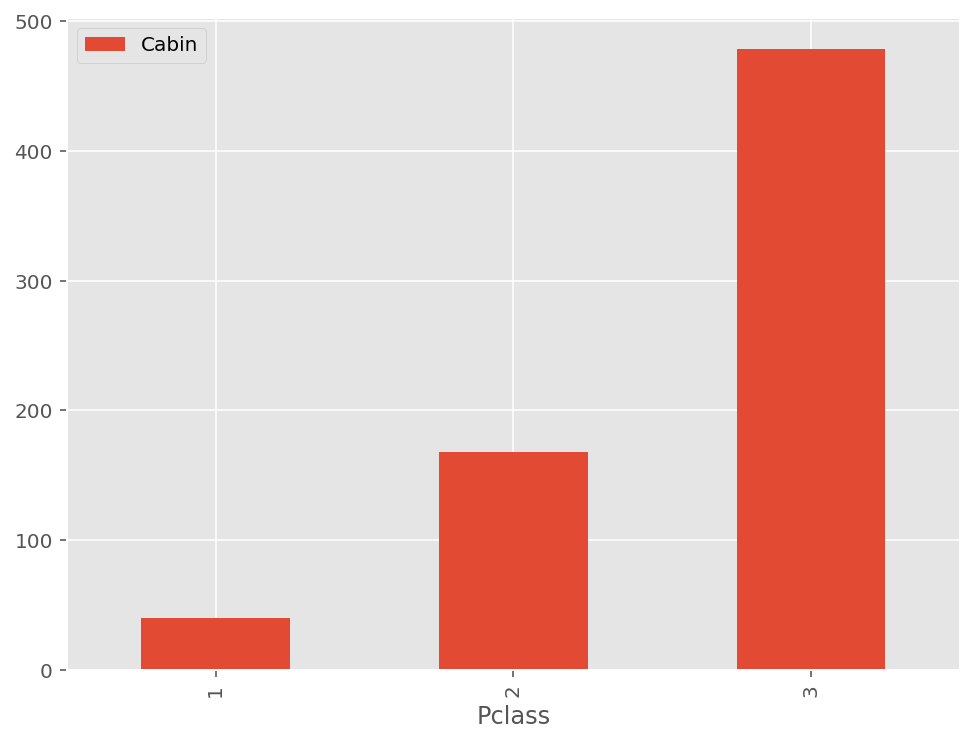

In [ ]:
data[["Pclass","Cabin"]].loc[data['Cabin'] == 'Missing'].groupby(by=["Pclass"]).count().plot(kind = 'bar')

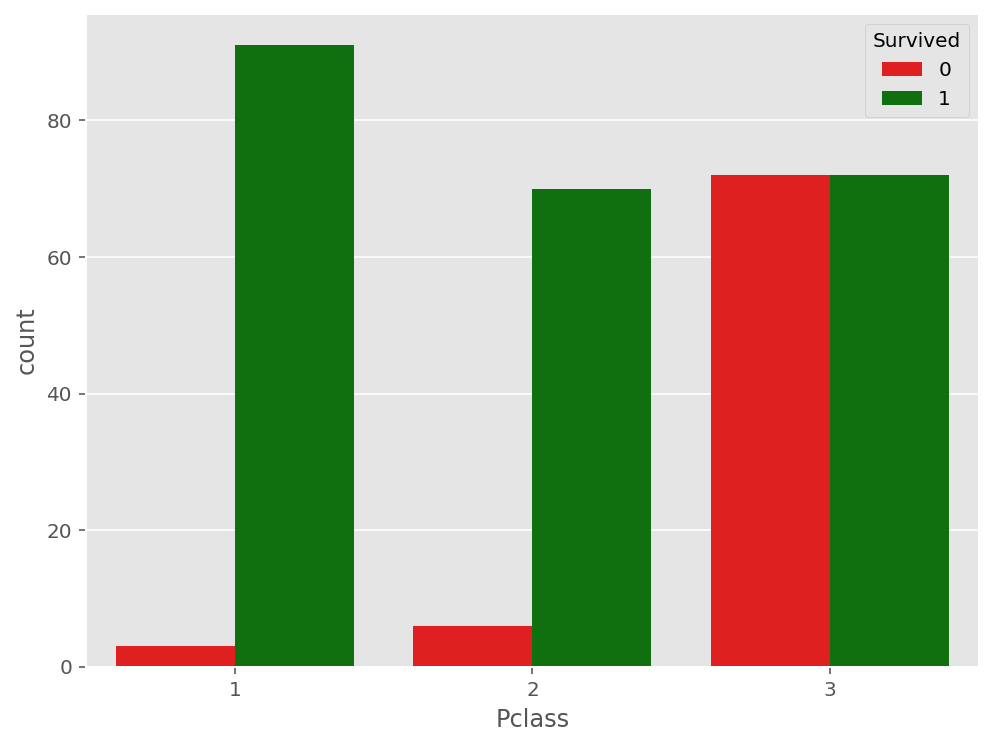

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=data[data['Sex']=='female'], palette={0: "r", 1: "g"})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


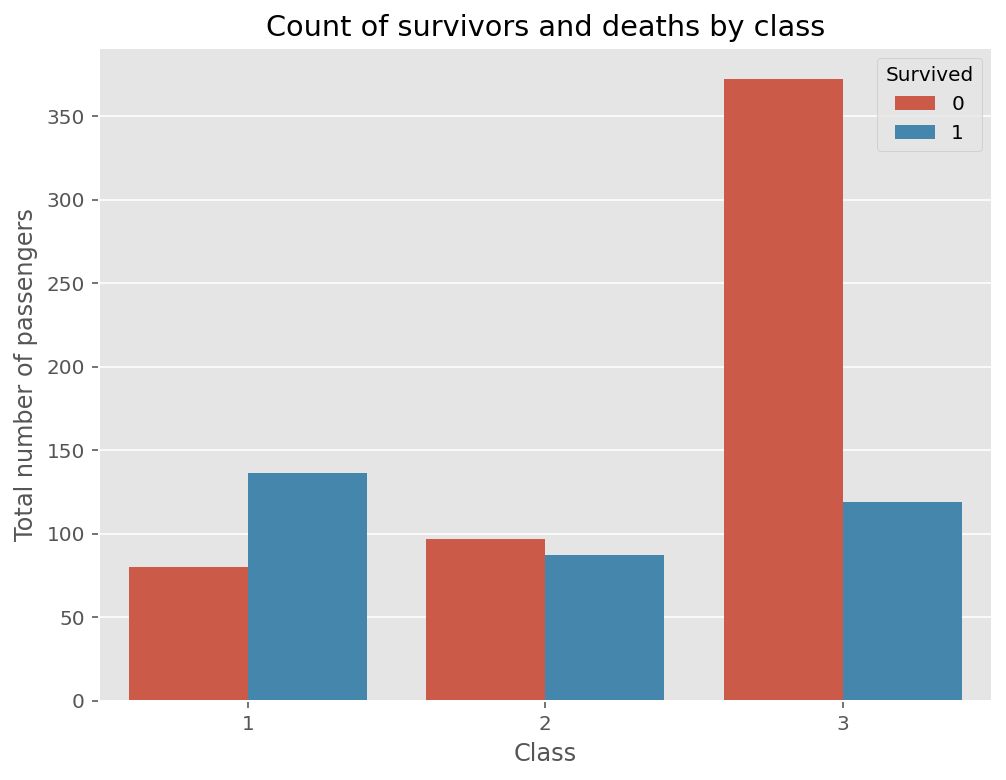

In [ ]:
sns.countplot(data.Pclass, hue=data.Survived)
plt.xlabel("Class")
plt.ylabel("Total number of passengers")
plt.title("Count of survivors and deaths by class");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


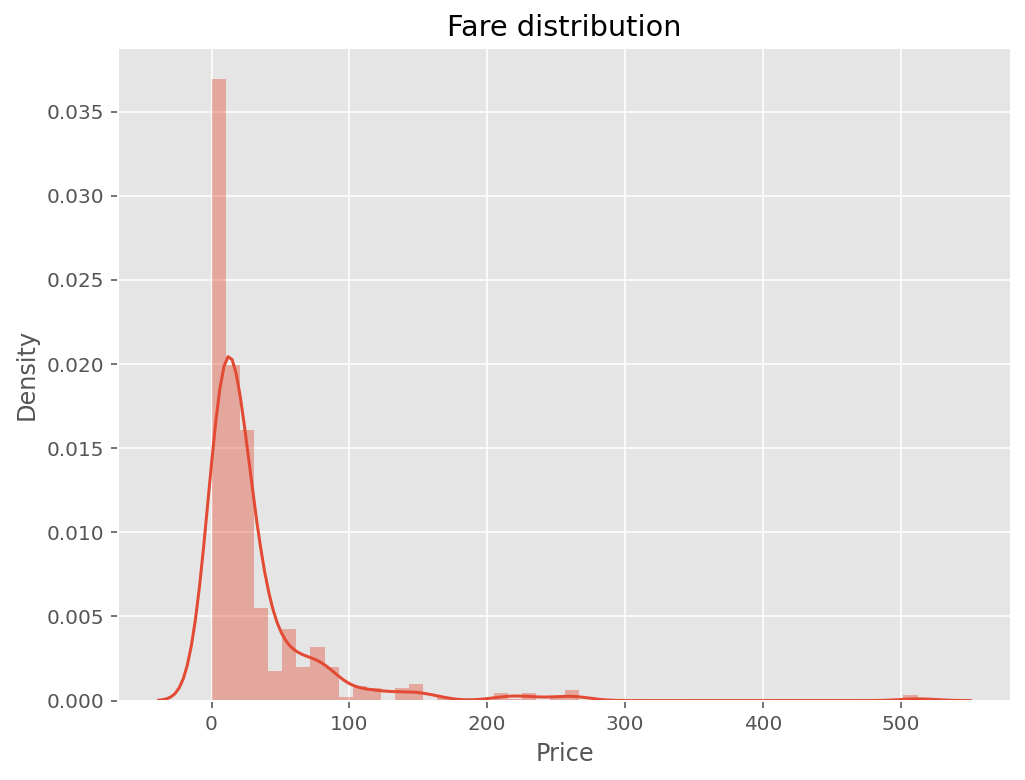

In [ ]:
#Plot to determine how to split Fare into categories
sns.distplot(data.Fare)
plt.title('Fare distribution')
plt.xlabel('Price')
plt.ylabel('Density');

In [ ]:
#Creating a new variable: 5 categories for the different prices paid
def categorize_fare(x):
  if x == 0:
        return 'free'
  elif x < 15:
        return 'low'
  elif x < 30:
        return 'avg'
  elif x < 100:
        return 'high'
  else:
        return 'v. high'
data['FareCat']= data['Fare'].apply(categorize_fare)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '% of survivors by fare category')

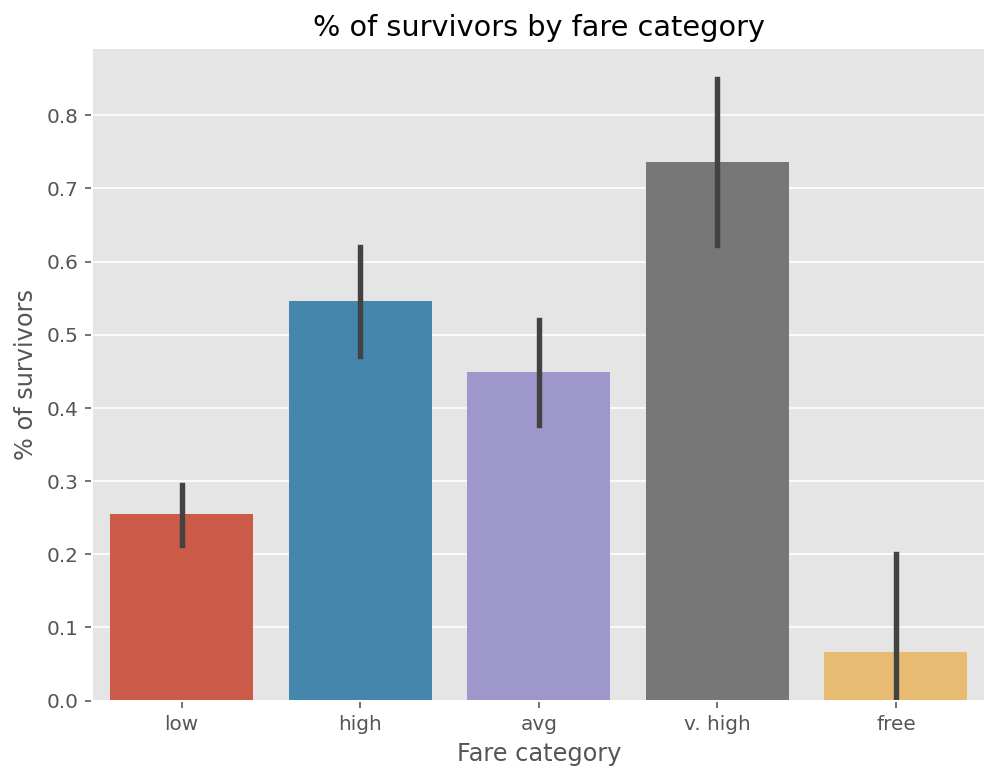

In [ ]:
sns.barplot(data.FareCat, data.Survived)
plt.ylabel("% of survivors")
plt.xlabel("Fare category")
plt.title("% of survivors by fare category")

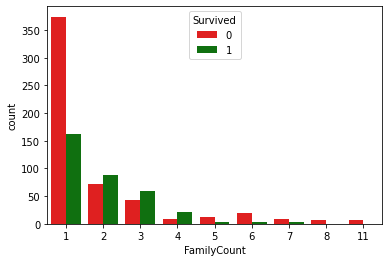

In [ ]:
# Number of members of a family traveling on the Titanic
data['FamilyCount']=data['Parch']+data['SibSp']+1
sns.countplot(x='FamilyCount', hue='Survived', data=data, palette={0: "r", 1: "g"})

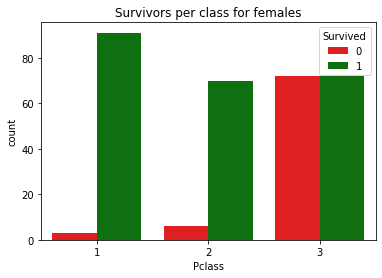

In [ ]:
# Number of female survivors and non-survivors by class
gender = "female"
ax = sns.countplot(x='Pclass', hue='Survived', data=data[data['Sex']==gender], palette={0: "r", 1: "g"})
ax.set_title('Survivors per class for '+gender+'s');

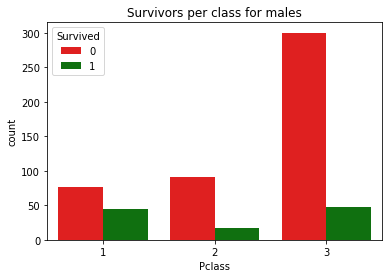

In [ ]:
# Number of males survivors and non-survivors by class
gender = "male"
ax = sns.countplot(x='Pclass', hue='Survived', data=data[data['Sex']==gender], palette={0: "r", 1: "g"})
ax.set_title('Survivors per class for '+gender+'s');